# Etape 1 : Nettoyage des données

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import missingno as msno
from scipy.stats import pointbiserialr

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## I) Nettoyage et transformation des données 

##### Notre dataset a 7 colonnes de 1338 lignes non nulles avec 4 variables de type numériques et 3 de types object. On va par la suite regarder explicitement notre dataset et transformer, supprimer si nécessairement des éléments aberrants ou non pertinents.

In [3]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
raw_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

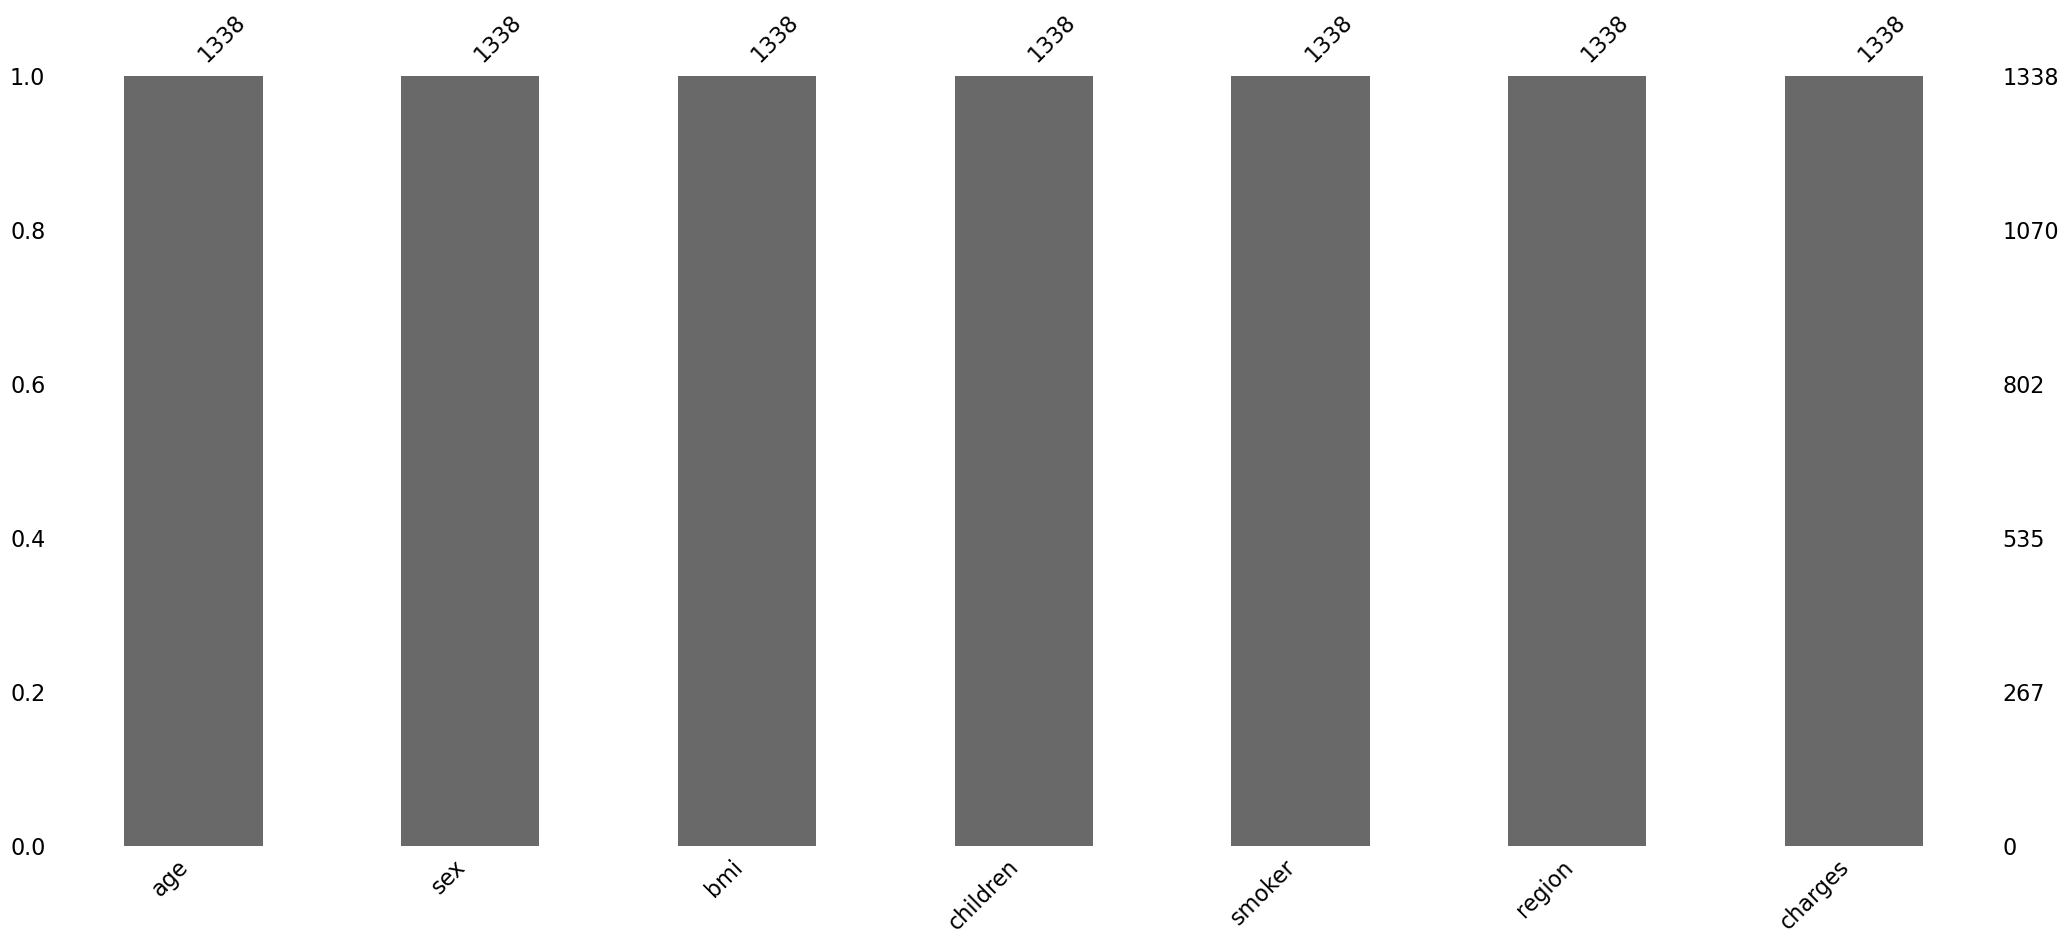

In [5]:
msno.bar(raw_data)

##### On remarque jusqu'à maintenant qu'il n'y a aucune valeurs manquante et aucune valeurs nulles dans notre dataset, ici l'axe de Y correspond à un pourcentage plus nos valeurs de 1 plus elles sont complètes (100%).

In [6]:
raw_data[raw_data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
raw_data = raw_data.drop_duplicates()
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### On a enlevé une ligne qui a été dupliqué dans notre dataset donc on passe à 1337 lignes, une ligne correspond à environ 0.07% de notre de dataset. On enlève au cas où il y aurait un impact plus tard mais vu la taille de notre jeu de données ça ne devrait pas poser de problème qu'elle soit présente ou non.

In [8]:
raw_data.bmi = raw_data.bmi.round(2)
raw_data.charges = raw_data.charges.round(2)

## II) Analyse de données

## 1.Distribution et répartition

#### On liste notre jeu de données pour regarder la pertinence de nos paramètres et par la suite observer si il y'a des valeurs aberrantes qu'on pourrait enlever.

In [9]:
raw_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663628,1.095737,13279.121503
std,14.044333,6.100233,1.205571,12110.359677
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.290000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.130000,5.000000,63770.430000


In [10]:
raw_data[raw_data['bmi'] > 30]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
6,46,female,33.44,1,no,southeast,8240.59
12,23,male,34.40,0,no,southwest,1826.84
13,56,female,39.82,0,no,southeast,11090.72
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.94
1332,52,female,44.70,3,no,southwest,11411.68
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98


##### On a remarqué plus haut que que la valeur max du bmi est de 53 et on sait que si une personne a un bmi supérieur à 30 il est en obésité morbide donc je regarde si il y'a plusieurs dans ce cas précis.

#### Pour avoir une meilleure compréhension de notre jeu de donnée, nous allons regarder la répartitions de nos variables avec des histogrammes.

In [11]:
# raw_data.charges = np.log(raw_data.charges)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

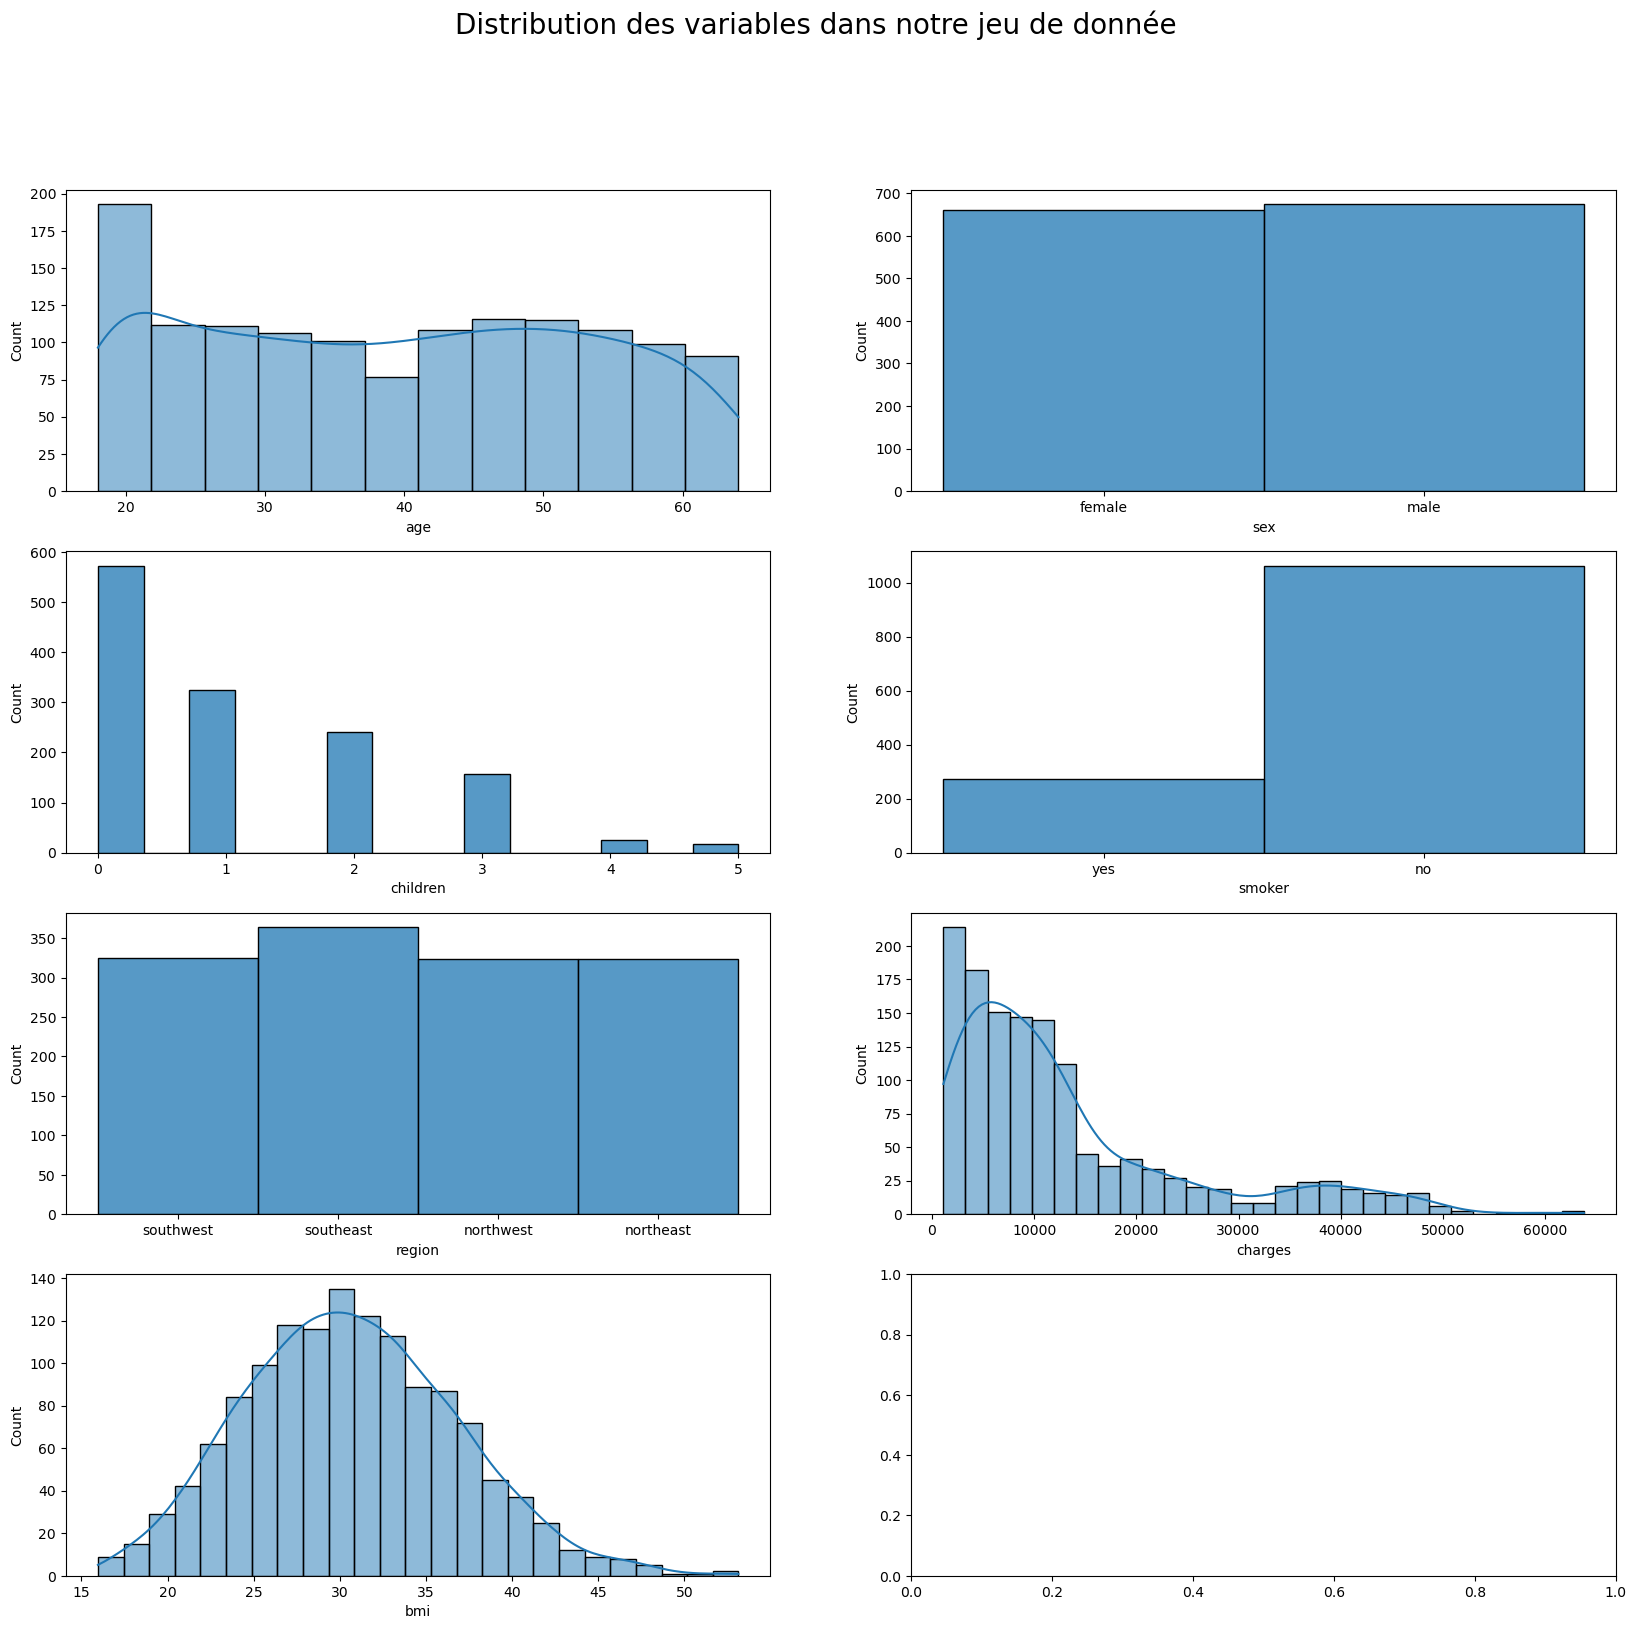

In [12]:
fig, ax =plt.subplots(4,2,figsize=(20,18))
plt.suptitle("Distribution des variables dans notre jeu de donnée",fontsize =20)
sns.histplot(ax=ax[0,0],x="age",data=raw_data,kde=True)
sns.histplot(ax=ax[0,1],x="sex",data=raw_data)
sns.histplot(ax=ax[1,0],x="children",data=raw_data)
sns.histplot(ax=ax[1,1],x="smoker",data=raw_data)
sns.histplot(ax=ax[2,0],x="region",data=raw_data)
sns.histplot(ax=ax[2,1],x="charges",data=raw_data,kde=True)
sns.histplot(ax=ax[3,0],x="bmi",data=raw_data,kde=True)



## 2.Corrélation avec la variable cible (charges)

#### Nous allons regarder la corrélation de notre dataset avec notre variable cible. Avant cela nous allons résumer la catégorie associé a chaque variables. Il y'a 2 variables quantitatives : âge,bmi et 4 variables qualitatives (catégorielle) : region,smoker,sexe,children.

### 2.1 Variables quantitatives

In [13]:
# liste = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# for index in raw_data:
#     if index in liste:
#         print("price / " + index)
#         plt.plot(raw_data[index], raw_data['charges'], 'rx', markersize=4)
#         plt.show()

<AxesSubplot:>

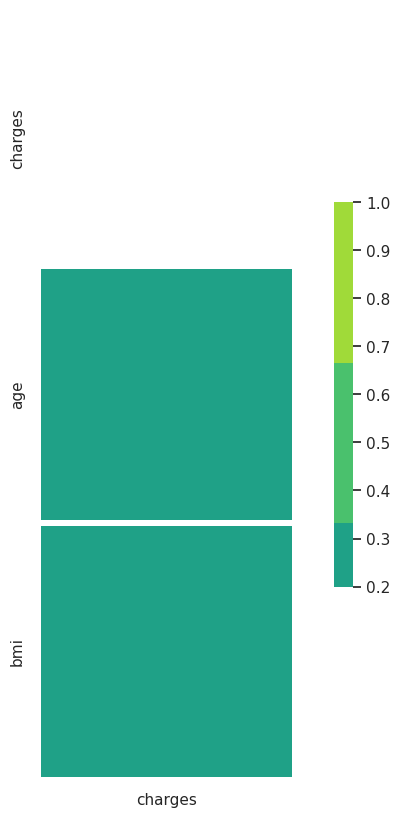

In [14]:
sns.set_theme(style="white")
corr = raw_data[['charges','age', 'bmi']].corr()[["charges"]]
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("viridis")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

In [15]:
raw_data[['charges','age', 'bmi']].corr()['charges'].sort_values(ascending=False).to_frame()

,charges
charges,1.000000
age,0.298308
bmi,0.198391


In [16]:
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


### 2.2 Variables catégorielles

##### Pour les variables catégiorelles , il est nécessaire d'utiliser différentes méthodes car on ne peut pas trouver la correlation entre une variable catégorielle et quantitatif aussi facilement. Pour le sexe et smoker qui sont des des variables binaires on peut utiliser une libraire biserial qui va nous permettre de la calculer , il faut pour cela au préalable les transformer en 0 ou 1. Pour région et children nous devons utiliser un test statistique ANOVA pour déterminer une p-value qui va valider de manière assez large/vague la correlation de nos variables.

In [17]:
from scipy.stats import pointbiserialr,f_oneway

categ = raw_data.copy()
region = categ.region.unique()
reg_dict = dict(zip(region,range(len(region))))
sexe = categ.sex.unique()
sex_dict = dict(zip(sexe,range(len(sexe))))
smoke =  categ.smoker.unique()
smok_dict = dict(zip(smoke,range(len(smoke))))

for k,v in reg_dict.items():
    categ.region = categ.region.replace(k,v,regex=False)
for k,v in sex_dict.items():
    categ.sex = categ.sex.replace(k,v,regex=False)
for k,v in smok_dict.items():
    categ.smoker = categ.smoker.replace(k,v,regex=False)   
smok_dict 

{'yes': 0, 'no': 1}

In [18]:
categ

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.92
1,18,1,33.77,1,1,1,1725.55
2,28,1,33.00,3,1,1,4449.46
3,33,1,22.70,0,1,2,21984.47
4,32,1,28.88,0,1,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,1,2,10600.55
1334,18,0,31.92,0,1,3,2205.98
1335,18,0,36.85,0,1,1,1629.83
1336,21,0,25.80,0,1,0,2007.94


In [19]:
categ["smoker"] = categ["smoker"].apply(lambda x: abs(x-1))


In [20]:
categ.smoker.mean()

0.2049364248317128

In [21]:
categ["smoker"].unique()

array([1, 0])

In [22]:
sex_corr = pointbiserialr(categ.sex,categ.charges)
sex_corr

PointbiserialrResult(correlation=0.05804450751626765, pvalue=0.03382075594787254)

<AxesSubplot:xlabel='sex', ylabel='charges'>

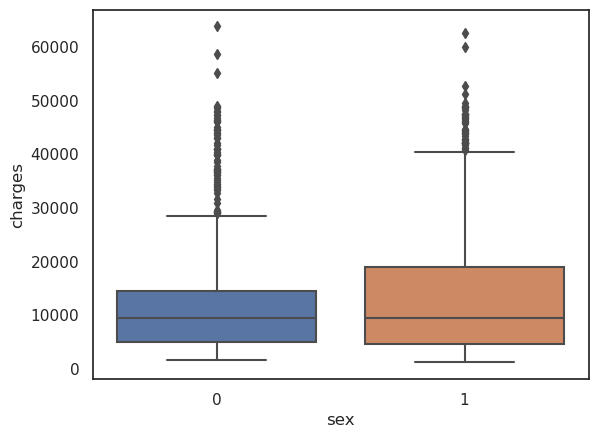

In [23]:
sns.boxplot(x= categ['sex'],y = categ["charges"])

il y a l'air d'avoir une plus grande variance pour les hommes voyons si la moyenne est la meme pu sensiblement pareil 

In [24]:
categ[categ['sex'] == 0].median()

age           40.00
sex            0.00
bmi           30.11
children       1.00
smoker         0.00
region         1.00
charges     9412.96
dtype: float64

In [25]:
categ[categ['sex'] == 1].median()

age           39.00
sex            1.00
bmi           30.69
children       1.00
smoker         0.00
region         1.00
charges     9377.90
dtype: float64

Nous voyons que bien que la mediane est la même par sexe , la moyenne quand a elle est différente 

<AxesSubplot:xlabel='sex', ylabel='charges'>

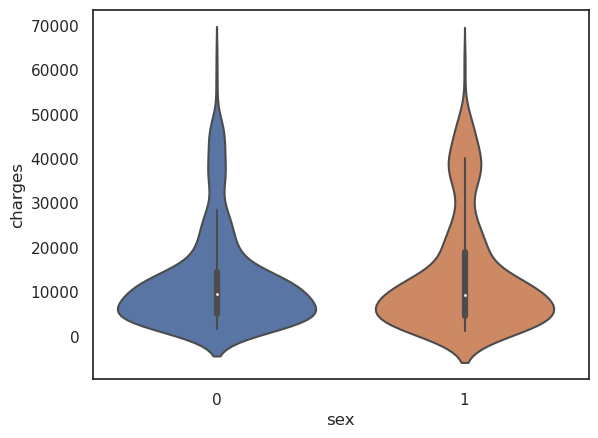

In [26]:
sns.violinplot(x= categ['sex'],y = categ["charges"])

cette repartition nous permet de mieux comprendre ce qui se passe

In [27]:
categ[categ['charges'] > 10000].mean()

age            46.162939
sex             0.509585
bmi            31.121917
children        1.116613
smoker          0.437700
region          1.530351
charges     22441.335479
dtype: float64

Nous voyons une predominance légère d'homme avec une charge supérieur a 20 000 , et une égalité (presque) pour les charges supérieur a 10 000
nous pourrions faire un test ANOVA mais comme la charge ne suit pas une loi normale , nous prefererons d'abord faire autre chose et par exemple regrouper en plusieurs groupe les charges 

In [28]:
# t-test here

In [29]:
categ

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.92
1,18,1,33.77,1,0,1,1725.55
2,28,1,33.00,3,0,1,4449.46
3,33,1,22.70,0,0,2,21984.47
4,32,1,28.88,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,2,10600.55
1334,18,0,31.92,0,0,3,2205.98
1335,18,0,36.85,0,0,1,1629.83
1336,21,0,25.80,0,0,0,2007.94


In [30]:
from scipy.stats import kruskal


In [31]:
# Sélection des données de la colonne "charges" en fonction de la colonne "region"
data = [categ[categ['region'] == r]['charges'] for r in categ['region'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")

statistic = 4.623, p_value = 0.202


Avec une telle P_value nous ne pouvons pas écarter l'hypothèse nulle 

Nous pouvons faire des post test par la suite 


<AxesSubplot:xlabel='bmi', ylabel='charges'>

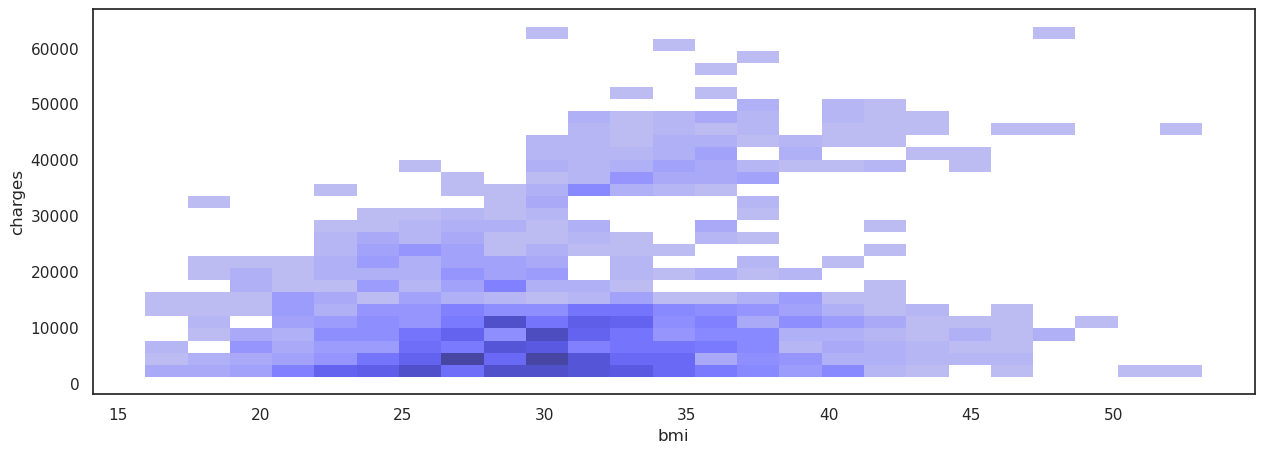

In [32]:
plt.figure(figsize = (15,5))
sns.histplot(x=categ["bmi"],y= categ["charges"], color="blue")

In [33]:
categ

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.92
1,18,1,33.77,1,0,1,1725.55
2,28,1,33.00,3,0,1,4449.46
3,33,1,22.70,0,0,2,21984.47
4,32,1,28.88,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,2,10600.55
1334,18,0,31.92,0,0,3,2205.98
1335,18,0,36.85,0,0,1,1629.83
1336,21,0,25.80,0,0,0,2007.94


ON voit que en regardant le BMI en fonction de si ce sont des fumeurs ou pas , on obtient quelque chose de plus exploitable , c'est a dire , quelque chose de bien plus correlé pour le premier graphe (correlation entre le bmi et la charge)

<AxesSubplot:xlabel='age', ylabel='charges'>

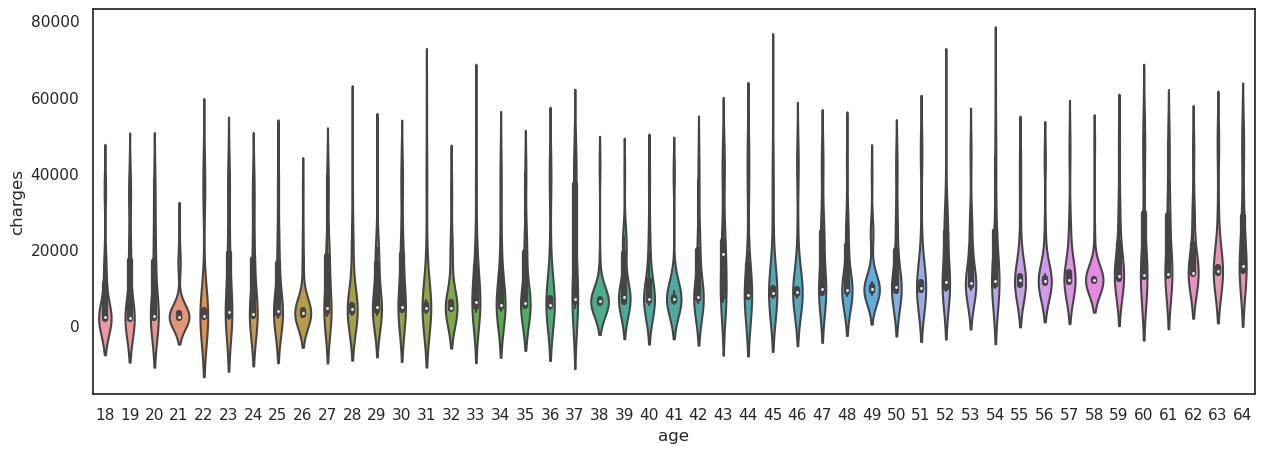

In [34]:
plt.figure(figsize = (15,5))
sns.violinplot(x= categ["age"],y = categ["charges"])

In [35]:
smok_corr = pointbiserialr(categ.smoker,categ.charges)
smok_corr

PointbiserialrResult(correlation=0.7872343680344994, pvalue=1.4067191603302416e-282)

In [36]:
smok_corr = pointbiserialr(categ.smoker,categ.charges)
smok_corr

PointbiserialrResult(correlation=0.7872343680344994, pvalue=1.4067191603302416e-282)

 de la on pourrait vouloir montrer que le fait de fumer ou non influe sur les charges 
 charge est une variable qunatitative et smoker est une categorie ....

In [37]:
reg_corr = f_oneway(categ.region,categ.charges)
reg_corr

F_onewayResult(statistic=1607.1593549826453, pvalue=1.4436480177348129e-275)

qu'est ce que ce resultat veut dire ?


In [38]:
child_corr = f_oneway(categ.children,categ.charges)
child_corr

F_onewayResult(statistic=1607.2533270278946, pvalue=1.4018829076217208e-275)

##### Pour le sexe et la catégorie fumeur ont une p-value inférieur à 0.05 cela signifie que la différence entre les charges et ces catégories sont statistiquement significatives et qu'elle rejetent l'hypothèse nulle selon laquelle elles n'auraient pas d'influence. Cependant la correlation avec le sexe est faible et celle de smoker est négative cela veut dire qu'elle a impact fort sur les charges. On a également des p-values inférieur à 0.05 pour les region et children ce qui indiquent également que l'hypothèse selon laquelle elle n'auraient pas d'infulence est nulle.

## 3.Analyse bivariée

Effectuer des analyse bivariées (sexe et fumeur par exemple).
Tu peux commencer par explorer les données avec des graphique 
(box plot ou violin plot avec seaborn par exemple)
Tu peux valider tes hypothèse grâce à un test statistique.
Pour chacun des points ci-dessus n'hésitez pas à utiliser des visualiations.

utilisons le dataset pour voir si par exemple , les hommes ont plus de chance de fumer que les femmes


In [39]:
raw_data.corr()

/tmp/ipykernel_18216/2464266106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,age,bmi,children,charges
age,1.000000,0.109347,0.041536,0.298308
bmi,0.109347,1.000000,0.012762,0.198391
children,0.041536,0.012762,1.000000,0.067389
charges,0.298308,0.198391,0.067389,1.000000


In [40]:
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [41]:
contingency_table = pd.crosstab(raw_data['smoker'], raw_data['sex'])

In [42]:
contingency_table

sex,female,male
smoker,,
no,547,516
yes,115,159


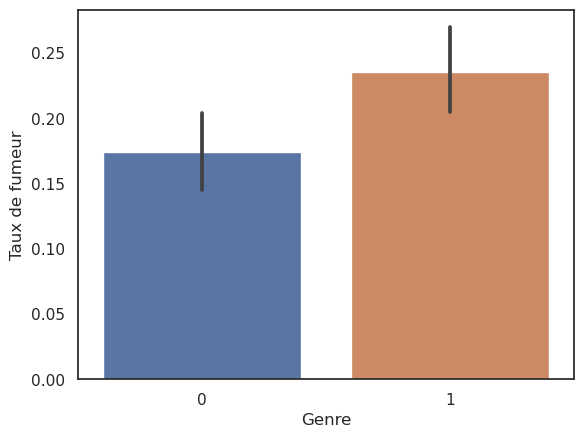

In [43]:
import seaborn as sns

# Créer un barplotii
sns.barplot(x='sex', y='smoker', data=categ)
plt.xlabel('Genre')
plt.ylabel('Taux de fumeur')
plt.show()


Taux de fumeurs par genre : on remarque que les femmes dans notre dataset fume plus 

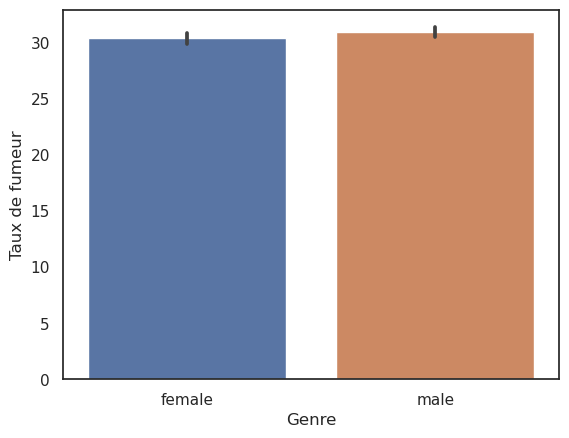

In [44]:
import seaborn as sns

# Créer un barplot
sns.barplot(x='sex', y='bmi', data=raw_data)
plt.xlabel('Genre')
plt.ylabel('Taux de fumeur')
plt.show()


Sensiblement pareil 


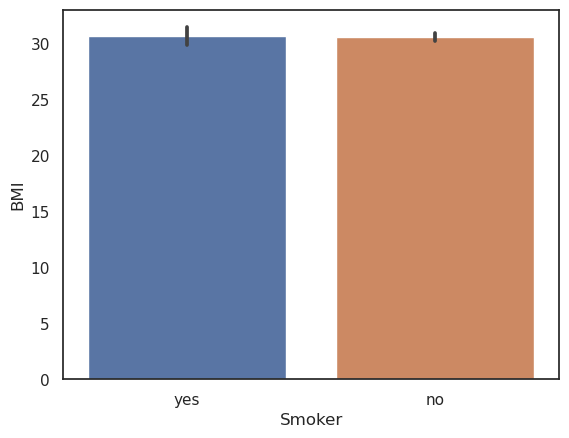

In [45]:
import seaborn as sns

# Créer un barplot
sns.barplot(x='smoker', y='bmi', data=raw_data)
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.show()


celui-ci a l'air completement égal , mais on voit que pour les non fumeurs la variance est plus élevé 

In [46]:
df_fumeurs  = categ[categ["smoker"] == 1]

In [47]:
df_fumeurs

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.92
11,62,0,26.29,0,1,1,27808.73
14,27,1,42.13,0,1,1,39611.76
19,30,1,35.30,0,1,0,36837.47
23,34,0,31.92,1,1,3,37701.88
...,...,...,...,...,...,...,...
1313,19,0,34.70,2,1,0,36397.58
1314,30,0,23.66,3,1,2,18765.88
1321,62,1,26.70,0,1,3,28101.33
1323,42,0,40.37,2,1,1,43896.38


In [48]:
moyenne_age = raw_data["age"].mean()

In [49]:
df_jeune  = raw_data[raw_data["age"]<= moyenne_age]

In [50]:
df_jeune.mean()

/tmp/ipykernel_18216/2786808988.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_jeune.mean()


age            27.060921
bmi            30.074368
children        1.065379
charges     10169.873893
dtype: float64

In [51]:
df_ager  = raw_data[raw_data["age"]> moyenne_age]

In [52]:
df_fumeurs.mean()

age            38.514599
sex             0.580292
bmi            30.708540
children        1.113139
smoker          1.000000
region          1.489051
charges     32050.231898
dtype: float64

In [53]:
df_non_fumeurs  = categ[categ["smoker"] == 0]

In [54]:
df_non_fumeurs.mean()

age           39.404516
sex            0.485419
bmi           30.652051
children       1.091251
smoker         0.000000
region         1.482596
charges     8440.660310
dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

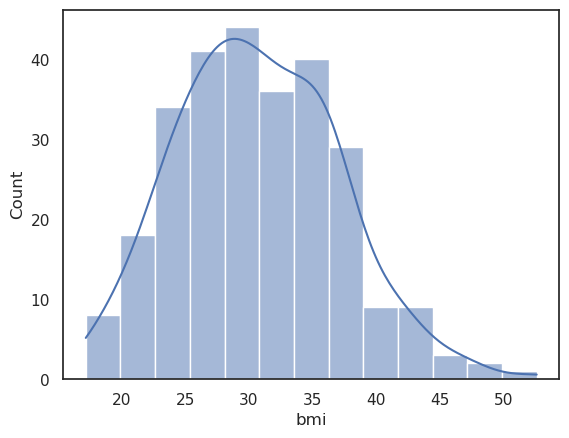

In [55]:
sns.histplot(x="bmi",data=df_fumeurs,kde=True)



histogramme avec le BMI pour les fumeurs

<AxesSubplot:xlabel='bmi', ylabel='Count'>

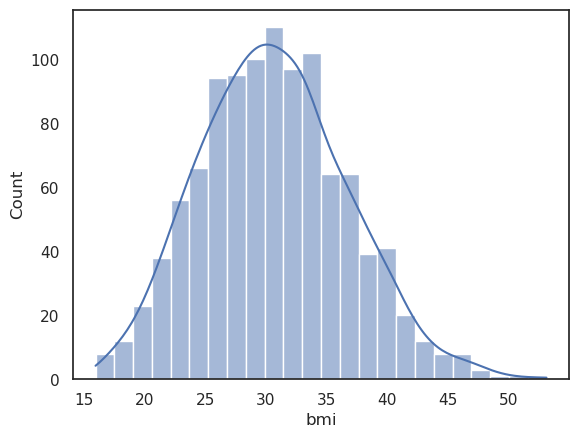

In [56]:
sns.histplot(x="bmi",data=df_non_fumeurs,kde=True)

pour les non_fumeurs

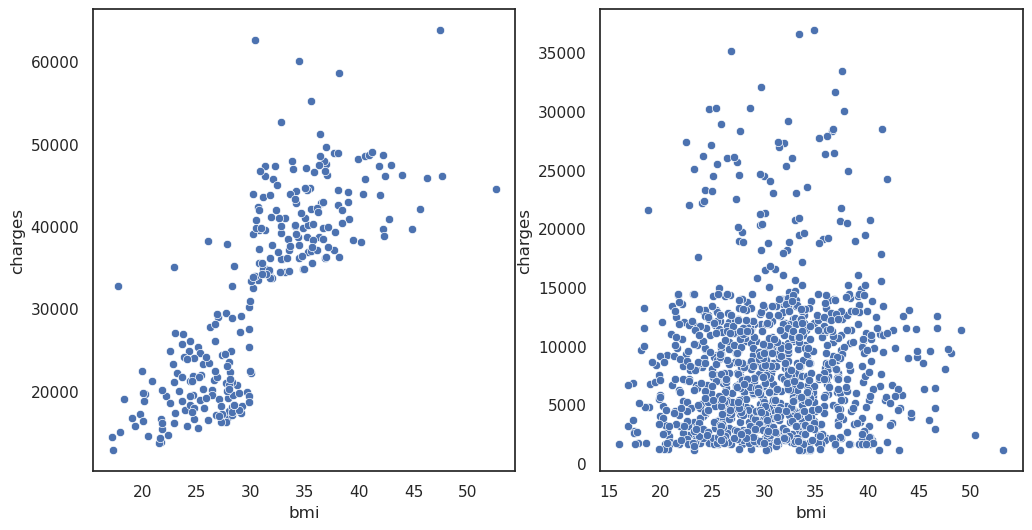

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot a histogram in each subplot
sns.scatterplot(df_fumeurs, x = df_fumeurs.bmi, y= df_fumeurs.charges , ax=ax1,)
sns.scatterplot(df_non_fumeurs, x= df_non_fumeurs.bmi, y = df_non_fumeurs.charges, ax=ax2,)

# Display the plot
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

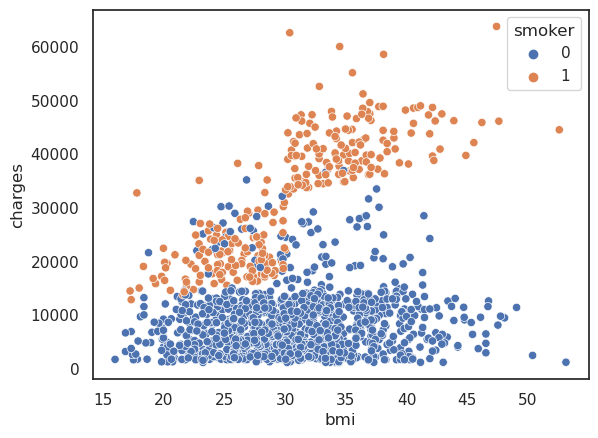

In [58]:
sns.scatterplot(categ, x = categ.bmi, y= categ.charges, hue = categ.smoker)

On put essayer de faire la correlation entre les fumeurs , le bmi et les charges 

In [59]:
df_fumeurs.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.005758,0.059687,0.081183,NaN,0.036548,0.368224
sex,-0.005758,1.000000,0.148357,0.076907,NaN,-0.066943,0.101226
bmi,0.059687,0.148357,1.000000,-0.012609,NaN,-0.212200,0.806484
children,0.081183,0.076907,-0.012609,1.000000,NaN,-0.015126,0.035945
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.036548,-0.066943,-0.212200,-0.015126,NaN,1.000000,-0.128984
charges,0.368224,0.101226,0.806484,0.035945,NaN,-0.128984,1.000000


On retrouve une bonne correlation chez les fumeurs entre le BMI et les charges , 0.8 

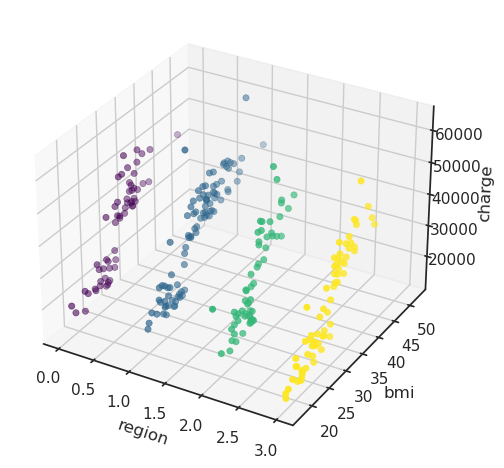

In [60]:
X = df_fumeurs['region']
Y = df_fumeurs['bmi']
Z = df_fumeurs['charges']

# Créer le graphique en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='viridis', linewidth=0.5)
ax.set_xlabel('region')
ax.set_ylabel('bmi')
ax.set_zlabel('charge')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [61]:
df_non_fumeurs.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020968,0.122746,0.032219,NaN,-0.010979,0.627400
sex,-0.020968,1.000000,0.019144,0.002959,NaN,0.010127,-0.055284
bmi,0.122746,0.019144,1.000000,0.019213,NaN,-0.143411,0.084065
children,0.032219,0.002959,0.019213,1.000000,NaN,-0.016550,0.138109
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,-0.010979,0.010127,-0.143411,-0.016550,NaN,1.000000,0.073865
charges,0.627400,-0.055284,0.084065,0.138109,NaN,0.073865,1.000000


On voit que pour les non fumeurs , la correlation est bien plus faible

<AxesSubplot:xlabel='age', ylabel='charges'>

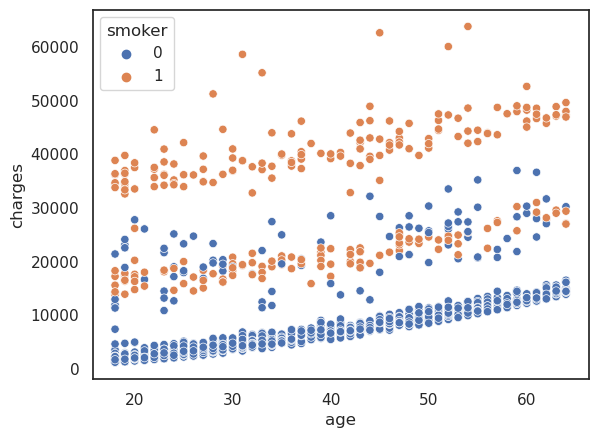

In [62]:
sns.scatterplot(categ, x = categ.age, y= categ.charges, hue = categ.smoker)

Nous remarquons dans ce graphique  une belle condensation de non fumeurs payant moins de 10000 de charges , cela suit une droite 
assez facilement, notre première hypothèse est que il s'agit de personne n'ayant pas d'enfant a charges , creons cettte colonne pour verifier 

In [63]:
df_non_fumeurs["seul"] = df_non_fumeurs["children"].apply(lambda x: 0 if x == 0 else 1)

/tmp/ipykernel_18216/3687387853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fumeurs["seul"] = df_non_fumeurs["children"].apply(lambda x: 0 if x == 0 else 1)


<AxesSubplot:xlabel='age', ylabel='charges'>

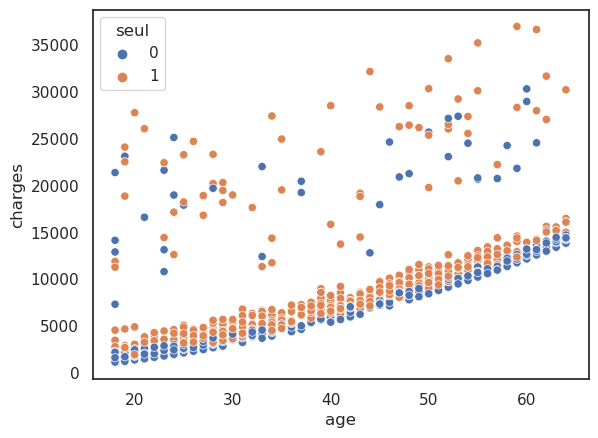

In [64]:
sns.scatterplot(df_non_fumeurs, x = df_non_fumeurs.age, y= df_non_fumeurs.charges, hue = df_non_fumeurs.seul)

On voit bien assez directement que cela ne correspond pas ,testons une autre hypothèses , cela serait du au bmi

In [65]:
df_nf = df_non_fumeurs[df_non_fumeurs['charges']<10000]

<AxesSubplot:xlabel='age', ylabel='charges'>

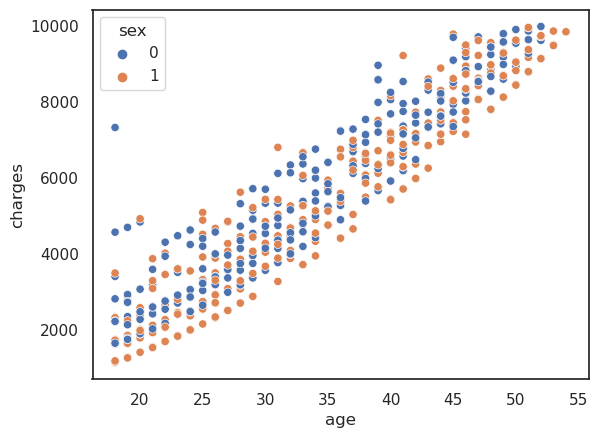

In [66]:
sns.scatterplot(df_nf, x = df_nf.age, y= df_nf.charges, hue = df_nf.sex)

Nous voyons une belle correlation entre l'age , et les charges pour les personne non fumeurs payant moins de 10000 de charges ( nous pourrions donc songez a creer cette categorie dans notre dataset pour modeliser )

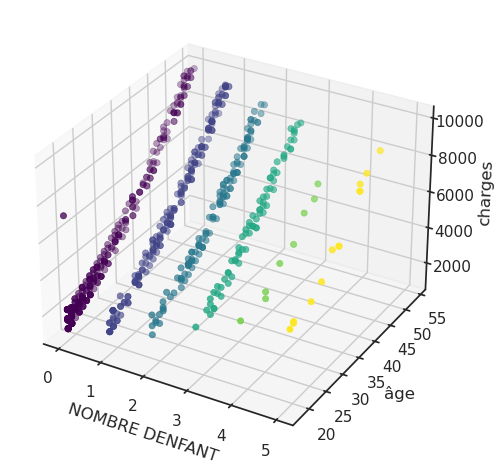

In [67]:
X = df_nf['children']
Y = df_nf['age']
Z = df_nf['charges']

# Créer le graphique en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='viridis', linewidth=0.5)
ax.set_xlabel('NOMBRE DENFANT')
ax.set_ylabel('âge')
ax.set_zlabel('charges')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [68]:
df_nf.corr()

,age,sex,bmi,children,smoker,region,charges,seul
age,1.000000,0.015921,0.084420,0.153800,NaN,-0.039539,0.956902,0.268352
sex,0.015921,1.000000,0.014128,0.051401,NaN,0.031378,-0.058795,0.032635
bmi,0.084420,0.014128,1.000000,0.000274,NaN,-0.155705,0.060910,0.026303
children,0.153800,0.051401,0.000274,1.000000,NaN,-0.013455,0.363388,0.763550
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,-0.039539,0.031378,-0.155705,-0.013455,NaN,1.000000,0.047718,-0.031381
charges,0.956902,-0.058795,0.060910,0.363388,NaN,0.047718,1.000000,0.406322
seul,0.268352,0.032635,0.026303,0.763550,NaN,-0.031381,0.406322,1.000000


Nous voyons encore des regroupement qui ont l'air de droite , donc on peut suspecter des bonne correlation 
 

In [69]:
df_non_fumeurs.corr()

,age,sex,bmi,children,smoker,region,charges,seul
age,1.000000,-0.020968,0.122746,0.032219,NaN,-0.010979,0.627400,0.031092
sex,-0.020968,1.000000,0.019144,0.002959,NaN,0.010127,-0.055284,0.001223
bmi,0.122746,0.019144,1.000000,0.019213,NaN,-0.143411,0.084065,0.014398
children,0.032219,0.002959,0.019213,1.000000,NaN,-0.016550,0.138109,0.779736
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,-0.010979,0.010127,-0.143411,-0.016550,NaN,1.000000,0.073865,-0.025586
charges,0.627400,-0.055284,0.084065,0.138109,NaN,0.073865,1.000000,0.118499
seul,0.031092,0.001223,0.014398,0.779736,NaN,-0.025586,0.118499,1.000000


<AxesSubplot:xlabel='region', ylabel='charges'>

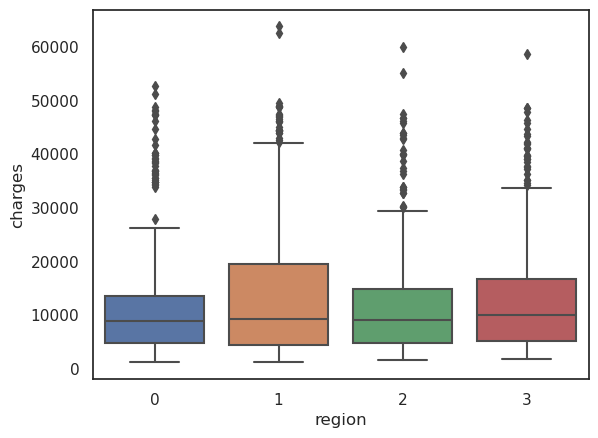

In [70]:
sns.boxplot(x=categ.region ,y = categ.charges)

Nous voyons que toute les regions n'ont pas les mêmes distribution , peut être certain on plus de rapport avec les charges 

<AxesSubplot:xlabel='region', ylabel='charges'>

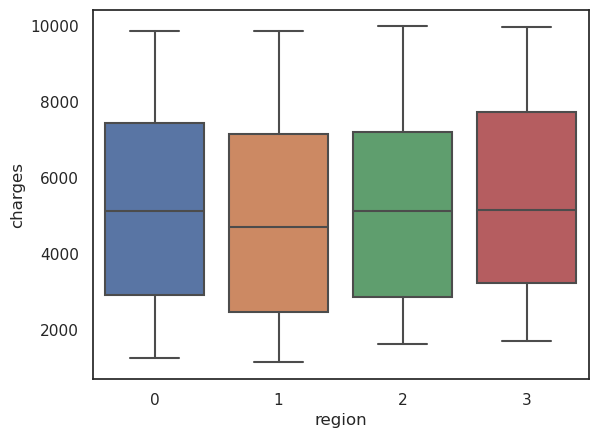

In [71]:
sns.boxplot(x = df_nf.region,y= df_nf.charges )

le code ne nous envoie plus de valuer "aberrante" et bien moins de variance, ils paraissent grosso modo pareil , nous suspectons encore les fumeurs de jouer un ôle la dedans 

<AxesSubplot:xlabel='region', ylabel='charges'>

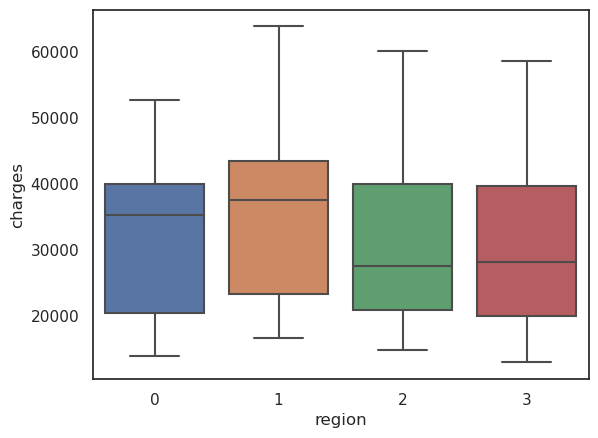

In [72]:
sns.boxplot(x=df_fumeurs.region, y = df_fumeurs.charges)

ici nous voyons une forte disparité entre les regions pour les fumeurs 
ce qui fait que elle peut paraitre peu impactante alors que elle peut l'être comme notre dataset a peu de fumeurs 

In [73]:
# Sélection des données de la colonne "charges" en fonction de la colonne "region"
data = [df_fumeurs[df_fumeurs['region'] == r]['charges'] for r in categ['region'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")

statistic = 9.931, p_value = 0.019


Nous pouvons donc invalider l'hypothese H0 , et il y a bien une region qui impact les charges pour les fumeurs 


In [74]:
categ.groupby(categ.region).corr()

age       sex       bmi  children    smoker   charges
region                                                                     
0      age       1.000000 -0.017761  0.212355 -0.008655 -0.112083  0.258358
       sex      -0.017761  1.000000  0.094047  0.014149  0.127140  0.092659
       bmi       0.212355  0.094047  1.000000  0.065811  0.033506  0.222928
       children -0.008655  0.014149  0.065811  1.000000  0.023911  0.028188
       smoker   -0.112083  0.127140  0.033506  0.023911  1.000000  0.804658
       charges   0.258358  0.092659  0.222928  0.028188  0.804658  1.000000
1      age       1.000000 -0.011497  0.019731  0.116481  0.032518  0.310593
       sex      -0.011497  1.000000  0.101856 -0.001619  0.098413  0.085228
       bmi       0.019731  0.101856  1.000000 -0.034462 -0.023142  0.142994
       children  0.116481 -0.001619 -0.034462  1.000000 -0.024285  0.046431
       smoker    0.032518  0.098413 -0.023142 -0.024285  1.000000  0.832165
       charges   0.310593  0.085228  0.142994  0.046431  0.832165  1.000000
2      age       1.000000 -0.024012  0.104329  0.059754  0.002278  0.334885
       sex      -0.024012  1.000000 -0.016200  0.030613  0.005765 -0.002658
       bmi       0.104329 -0.016200  1.000000  0.084001 -0.005029  0.182107
       children  0.059754  0.030613  0.084001  1.000000  0.049736  0.157897
       smoker    0.002278  0.005765 -0.005029  0.049736  1.000000  0.749301
       charges   0.334885 -0.002658  0.182107  0.157897  0.749301  1.000000
3      age       1.000000 -0.026265  0.158724 -0.007530 -0.037428  0.300951
       sex      -0.026265  1.000000 -0.025314  0.033279  0.065436  0.040076
       bmi       0.158724 -0.025314  1.000000 -0.021205 -0.052398  0.231731
       children -0.007530  0.033279 -0.021205  1.000000 -0.000648  0.067929
       smoker   -0.037428  0.065436 -0.052398 -0.000648  1.000000  0.739056
       charges   0.300951  0.040076  0.231731  0.067929  0.739056  1.000000

In [75]:
df_fumeurs.groupby(df_fumeurs.region).corr()

age       sex       bmi  children  smoker   charges
region                                                                   
0      age       1.000000 -0.052225  0.113604  0.135341     NaN  0.454878
       sex      -0.052225  1.000000  0.122891  0.094500     NaN  0.039182
       bmi       0.113604  0.122891  1.000000 -0.105772     NaN  0.802734
       children  0.135341  0.094500 -0.105772  1.000000     NaN -0.064664
       smoker         NaN       NaN       NaN       NaN     NaN       NaN
       charges   0.454878  0.039182  0.802734 -0.064664     NaN  1.000000
1      age       1.000000  0.028115 -0.061987 -0.045249     NaN  0.304448
       sex       0.028115  1.000000  0.097991  0.042454     NaN  0.130035
       bmi      -0.061987  0.097991  1.000000 -0.007525     NaN  0.795512
       children -0.045249  0.042454 -0.007525  1.000000     NaN -0.025202
       smoker         NaN       NaN       NaN       NaN     NaN       NaN
       charges   0.304448  0.130035  0.795512 -0.025202     NaN  1.000000
2      age       1.000000  0.034662  0.064314  0.157663     NaN  0.370141
       sex       0.034662  1.000000  0.180133  0.356734     NaN  0.046061
       bmi       0.064314  0.180133  1.000000  0.057416     NaN  0.747367
       children  0.157663  0.356734  0.057416  1.000000     NaN  0.221733
       smoker         NaN       NaN       NaN       NaN     NaN       NaN
       charges   0.370141  0.046061  0.747367  0.221733     NaN  1.000000
3      age       1.000000 -0.032002  0.193856  0.142046     NaN  0.394955
       sex      -0.032002  1.000000  0.184763 -0.162478     NaN  0.124665
       bmi       0.193856  0.184763  1.000000  0.068986     NaN  0.874102
       children  0.142046 -0.162478  0.068986  1.000000     NaN  0.077304
       smoker         NaN       NaN       NaN       NaN     NaN       NaN
       charges   0.394955  0.124665  0.874102  0.077304     NaN  1.000000

In [76]:
df_non_fumeurs.groupby(df_non_fumeurs.region).corr()

age       sex       bmi  children  smoker   charges  \
region                                                                      
0      age       1.000000  0.006410  0.238351 -0.035992     NaN  0.698535   
       sex       0.006410  1.000000  0.084255 -0.006151     NaN -0.041472   
       bmi       0.238351  0.084255  1.000000  0.099677     NaN  0.164368   
       children -0.035992 -0.006151  0.099677  1.000000     NaN  0.051468   
       smoker         NaN       NaN       NaN       NaN     NaN       NaN   
       charges   0.698535 -0.041472  0.164368  0.051468     NaN  1.000000   
       seul     -0.006687 -0.010237  0.068081  0.757722     NaN  0.041449   
1      age       1.000000 -0.028572  0.050646  0.164278     NaN  0.674488   
       sex      -0.028572  1.000000  0.107310 -0.011098     NaN -0.067830   
       bmi       0.050646  0.107310  1.000000 -0.044186     NaN -0.034228   
       children  0.164278 -0.011098 -0.044186  1.000000     NaN  0.209835   
       smoker         NaN       NaN       NaN       NaN     NaN       NaN   
       charges   0.674488 -0.067830 -0.034228  0.209835     NaN  1.000000   
       seul      0.112111 -0.038073 -0.035670  0.761853     NaN  0.137428   
2      age       1.000000 -0.037297  0.112637  0.035507     NaN  0.583929   
       sex      -0.037297  1.000000 -0.054544 -0.047478     NaN -0.033961   
       bmi       0.112637 -0.054544  1.000000  0.090413     NaN  0.131906   
       children  0.035507 -0.047478  0.090413  1.000000     NaN  0.172791   
       smoker         NaN       NaN       NaN       NaN     NaN       NaN   
       charges   0.583929 -0.033961  0.131906  0.172791     NaN  1.000000   
       seul     -0.015899  0.010665  0.063356  0.802839     NaN  0.131854   
3      age       1.000000 -0.021940  0.147942 -0.038733     NaN  0.568239   
       sex      -0.021940  1.000000 -0.078194  0.076924     NaN -0.079413   
       bmi       0.147942 -0.078194  1.000000 -0.042616     NaN  0.182430   
       children -0.038733  0.076924 -0.042616  1.000000     NaN  0.120985   
       smoker         NaN       NaN       NaN       NaN     NaN       NaN   
       charges   0.568239 -0.079413  0.182430  0.120985     NaN  1.000000   
       seul      0.031745  0.044484 -0.030252  0.802027     NaN  0.167804   

                     seul  
region                     
0      age      -0.006687  
       sex      -0.010237  
       bmi       0.068081  
       children  0.757722  
       smoker         NaN  
       charges   0.041449  
       seul      1.000000  
1      age       0.112111  
       sex      -0.038073  
       bmi      -0.035670  
       children  0.761853  
       smoker         NaN  
       charges   0.137428  
       seul      1.000000  
2      age      -0.015899  
       sex       0.010665  
       bmi       0.063356  
       children  0.802839  
       smoker         NaN  
       charges   0.131854  
       seul      1.000000  
3      age       0.031745  
       sex       0.044484  
       bmi      -0.030252  
       children  0.802027  
       smoker         NaN  
       charges   0.167804  
       seul      1.000000

<AxesSubplot:xlabel='sex', ylabel='charges'>

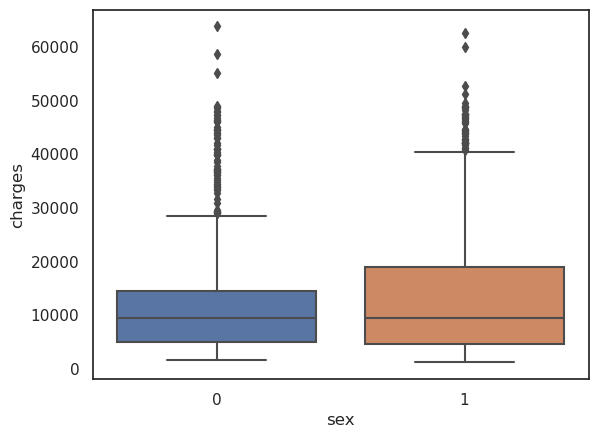

In [77]:
sns.boxplot(x="sex",y = "charges" ,data=categ)

ce graphique revele que si correlation il y a elle doit pas etre enorme , mais on est en droit de se poser la question pourquoi une telle variance pour les hommes

<AxesSubplot:xlabel='sex', ylabel='charges'>

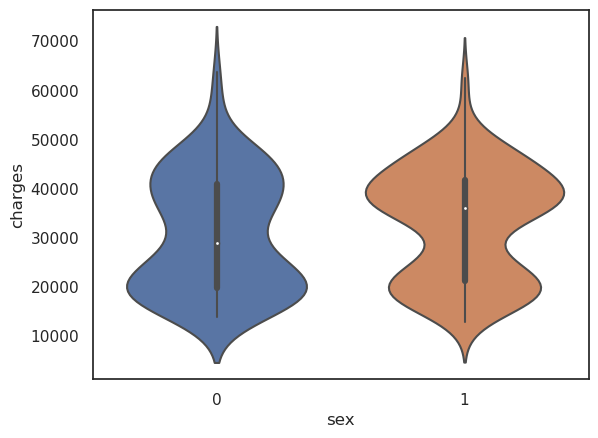

In [78]:
sns.violinplot(x= df_fumeurs.sex , y = df_fumeurs.charges)

<AxesSubplot:xlabel='sex', ylabel='charges'>

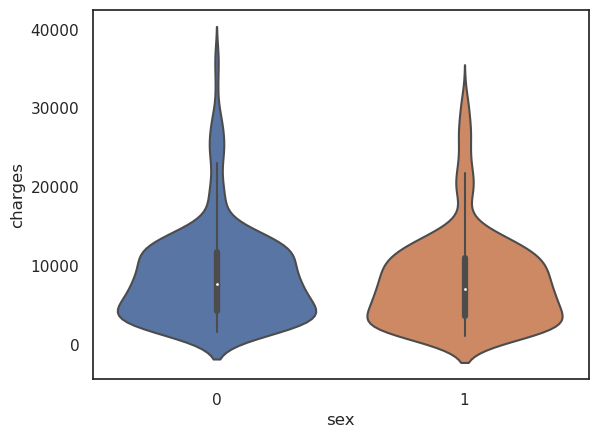

In [79]:
sns.violinplot(x= df_non_fumeurs.sex , y= df_non_fumeurs.charges)

In [80]:
df_fumeurs.mean()

age            38.514599
sex             0.580292
bmi            30.708540
children        1.113139
smoker          1.000000
region          1.489051
charges     32050.231898
dtype: float64

In [81]:
df_non_fumeurs.mean()

age           39.404516
sex            0.485419
bmi           30.652051
children       1.091251
smoker         0.000000
region         1.482596
charges     8440.660310
seul           0.569144
dtype: float64

In [82]:
raw_data[raw_data["bmi"]> 24.9].mean()

/tmp/ipykernel_18216/1832901590.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data[raw_data["bmi"]> 24.9].mean()


age            39.849315
bmi            32.540740
children        1.092237
charges     13947.847032
dtype: float64

In [83]:
ages = raw_data['age']

In [84]:
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Appliquer pd.cut à la série d'âges
# Regrouper les âges en 5 tranches de taille égale
age_groups = pd.qcut(ages, q=5)


# III) Modélisation

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor


In [86]:
X = raw_data.drop('charges', axis=1)
y = raw_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.008391983483461818

##### PREPARATION DE LA MODELISATION :NOUS AVONS VU QUE LES REGIONS SEMBLE AVOIR PEU D'IMPACT , POURTANT POUR LES FUMEURS DEUX REGION SEMBLE AVOIR UN PLUS GROS IMPACT NOUS ALLONS DONC CREER UNE COLONNE FUMEUR ET REGION 1 , et fumeur et region 0 

In [87]:
# Créer une série de booléens indiquant si chaque personne est un fumeur
is_smoker = categ['smoker'] == 1


In [88]:
# Sélectionner les fumeurs de la région 0
region_0_smokers = categ[(categ['region'] == 0) & is_smoker]

# Sélectionner les fumeurs de la région 1
region_1_smokers = categ[(categ['region'] == 1) & is_smoker]


In [89]:
# Créer une colonne indiquant par 0 ou 1 si la personne est un fumeur de la région 0
categ['region_0_smoker'] = (categ['region'] == 0) & is_smoker

# Créer une colonne indiquant par 0 ou 1 si la personne est un fumeur de la région 1
categ['region_1_smoker'] = (categ['region'] == 1) & is_smoker


In [90]:
categ

,age,sex,bmi,children,smoker,region,charges,region_0_smoker,region_1_smoker
0,19,0,27.90,0,1,0,16884.92,True,False
1,18,1,33.77,1,0,1,1725.55,False,False
2,28,1,33.00,3,0,1,4449.46,False,False
3,33,1,22.70,0,0,2,21984.47,False,False
4,32,1,28.88,0,0,2,3866.86,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,2,10600.55,False,False
1334,18,0,31.92,0,0,3,2205.98,False,False
1335,18,0,36.85,0,0,1,1629.83,False,False
1336,21,0,25.80,0,0,0,2007.94,False,False


In [91]:
# Créer une colonne indiquant par 0 ou 1 si la personne est un fumeur de la région 0
# Convertir la colonne en valeurs numériques
categ['region_0_smoker'] = categ['region_0_smoker'].astype(int)



In [92]:

# Convertir la colonne en valeurs numériques
categ['region_1_smoker'] = categ['region_1_smoker'].astype(int)


In [93]:
categ.corr()

,age,sex,bmi,children,smoker,region,charges,region_0_smoker,region_1_smoker
age,1.000000,-0.019814,0.109347,0.041536,-0.025587,-0.001626,0.298308,-0.047306,0.009897
sex,-0.019814,1.000000,0.046403,0.017848,0.076596,-0.004936,0.058045,0.056677,0.053800
bmi,0.109347,0.046403,1.000000,0.012762,0.003739,-0.157565,0.198391,0.011927,0.107828
children,0.041536,0.017848,0.012762,1.000000,0.007331,-0.016258,0.067389,0.019642,-0.021469
smoker,-0.025587,0.076596,0.003739,0.007331,1.000000,0.002358,0.787234,0.419440,0.532296
region,-0.001626,-0.004936,-0.157565,-0.016258,0.002358,1.000000,0.006547,-0.286027,-0.118373
charges,0.298308,0.058045,0.198391,0.067389,0.787234,0.006547,1.000000,0.334047,0.481431
region_0_smoker,-0.047306,0.056677,0.011927,0.019642,0.419440,-0.286027,0.334047,1.000000,-0.057549
region_1_smoker,0.009897,0.053800,0.107828,-0.021469,0.532296,-0.118373,0.481431,-0.057549,1.000000


In [94]:
# categ.to_csv("cleaned2.csv",index=False)

PAR CONTRE NOUS AVONS VU QUE pOUR LES non fumeurs ayant une charge de moins de 10k cela était fort correlé à l'âge , mais nous ne pouvons pas utiliser cela 

In [95]:
raw_data.bmi.min()

15.96

In [96]:
raw_data[raw_data.bmi!='normal']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [97]:
df = raw_data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [98]:
df["bmi"]= np.where(df['bmi'].between(15,24),0, df['bmi'])
df["bmi"]= np.where(df['bmi'].between(24.01,30),1, df['bmi'])
df["bmi"]= np.where(df['bmi'].between(30.01,40),2, df['bmi'])
df["bmi"]= np.where(df['bmi'].between(40.01,54),3, df['bmi'])




In [99]:
dico = {0:'normal',1:'surpoids',2:'obèse',3:'obésité morbide'}
for k,v in dico.items():
    df.bmi = df.bmi.replace(k,v,regex=False)
df.bmi

0       surpoids
1          obèse
2          obèse
3         normal
4       surpoids
          ...   
1333       obèse
1334       obèse
1335       obèse
1336    surpoids
1337    surpoids
Name: bmi, Length: 1337, dtype: object

In [100]:
df.to_csv("cleaned2.csv",index=False)